In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-plot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
# configure graph style
import seaborn as sns
import matplotlib.pyplot as plt
import scikitplot as skplt
sns.set_style('whitegrid')

palette = sns.color_palette("coolwarm", 7)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Aurum/lead_export.csv')

In [ ]:
df.head(2)

,Lead's Id,Salutation,First Name,Last Name,Lead Hotness,Lead Stage,Lead Status,Phone,Verified,Phone Country,Secondary Phones,Email,Secondary Emails,Projects,Project Count,Location,Address,Street,City,Region,Zip Code,Country,Property Type,Min Budget,Max Budget,Min Possession,Max Possession,Bedroom Preference,Purpose,Funding Source,Furnishing,Facing,Transaction type,Bathroom preference,Area,Configuration,NRI,First-Campaign,First-Source Of Enquiry,First-Sub Source,...,Site visit Status,Next Site visit Date,Third Last Note,Second Last Note,Last note,Last Call Note(Answered),Last note of calls,First Contact Attempt,Total Incoming Answered Calls,Total Incoming Not Answered Calls,Total Outgoing Answered Calls,Total Outgoing Not Answered Calls,Dropoff On,Dropoff By,Dropoff Reason,System Tags,Manual Tags,Secondary Sales,Last Re-engaged On,Re-engaged Dates With Sources,Pulled Date,Pulled by,Pulled from,Analytics,Company Name,Designation,Incomes,Date Of Birth,Age,Gender,Anniversary,Marital Status,Bank and Loans,Industry,Attended By Sales Id,Attended By Team,Deal stage,Channel Partner,Aurum Q Islands,Aurum Q Residences
0,894,NaN,MAHESH,TAMBE,9,Unqualified,NaN,9.200000e+11,Not Verified,India,NaN,arvindlendhe@gmail.com,NaN,Aurum Q Islands,1,NaN,NaN,NaN,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,End Use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Property Portals,housing,NaN,...,NaN,NaN,Note added on 04/06/21 06:35 PM.\nCustomer loo...,Note added on 05/06/21 11:01 AM.\nTried callin...,Note added on 16/06/21 06:54 PM.\ncustomer loo...,NaN,NaN,4/6/2021 18:33,0,1,1,2,16-06-2021 18:55,Cx 2,Location Mismatch,"Property Portals, Housing, Bulk Upload, Organi...",NaN,NaN,04/06/2021 08:17 PM - N/A,04/06/2021 08:17 PM - N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,60a3ca954443ae32285d4c78,Presales Team,Aurum Q Islands(Prospect),NaN,Aurum Q Islands,NaN
1,1069,NaN,Jay,NaN,5,Non Contactable,Cold,9.200000e+11,Not Verified,India,NaN,sandeeplondhe52@gmail.com,NaN,Aurum Q Islands,1,NaN,NaN,NaN,NaN,NaN,NaN,India,NaN,NaN,NaN,NaN,NaN,NaN,End Use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Property Portals,housing,NaN,...,NaN,NaN,Note added on 12/07/21 10:11 AM.\nringing,Note added on 22/07/21 11:05 AM.\nringing,Note added on 22/07/21 11:15 AM.\ndisconnected,NaN,NaN,4/6/2021 18:21,1,5,0,8,NaN,NaN,NaN,"Property Portals, Housing, Bulk Upload, Organi...",NaN,NaN,04/06/2021 06:26 PM - N/A,04/06/2021 06:26 PM - N/A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,60a3ca954443ae32285d4c78,Presales Team,Aurum Q Islands(Prospect),NaN,Aurum Q Islands,NaN


In [ ]:
#database dimension
print("Database dimension     :",df.shape)
print("Database size          :",df.size)
print("Number of Row          :",len(df.index))
print("Number of Columns      :",len(df.columns))

Database dimension     : (1864, 100)
Database size          : 186400
Number of Row          : 1864
Number of Columns      : 100


In [ ]:
#checking numerical columns statistics
df.describe()

,Lead's Id,Lead Hotness,Phone,Project Count,Zip Code,Min Budget,Max Budget,Bathroom preference,Area,Re-engaged Count,Total Incoming Answered Calls,Total Incoming Not Answered Calls,Total Outgoing Answered Calls,Total Outgoing Not Answered Calls,Secondary Sales,Pulled Date,Pulled by,Pulled from,Company Name,Designation,Incomes,Age,Bank and Loans,Channel Partner
count,1864.000000,1864.000000,1.861000e+03,1864.000000,1.0,1.230000e+02,7.000000e+01,2.000000,2.000000,1864.000000,1864.000000,1864.000000,1864.000000,1864.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.000000,0.0,0.0
mean,4210.532189,10.366416,5.079287e+13,0.873391,400701.0,5.212196e+06,6.964287e+06,1.500000,707.500000,0.298283,0.152361,0.339056,0.998927,2.841738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
std,2731.345820,6.442726,2.130379e+15,0.383587,NaN,4.854583e+06,7.262829e+06,0.707107,10.606602,0.737812,0.431409,0.993191,0.980212,4.265750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.071068,NaN,NaN
min,1.000000,0.000000,8.282440e+05,0.000000,400701.0,1.000000e+00,1.100000e+00,1.000000,700.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.000000,NaN,NaN
25%,1135.500000,8.000000,9.190000e+11,1.000000,400701.0,1.900000e+06,5.000450e+05,1.250000,703.750000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.500000,NaN,NaN
50%,3979.500000,11.000000,9.200000e+11,1.000000,400701.0,4.500000e+06,5.500000e+06,1.500000,707.500000,0.000000,0.000000,0.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.000000,NaN,NaN
75%,6872.250000,11.000000,9.200000e+11,1.000000,400701.0,8.000000e+06,1.075000e+07,1.750000,711.250000,0.000000,0.000000,0.000000,1.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.500000,NaN,NaN
max,7338.000000,83.000000,9.190000e+16,2.000000,400701.0,3.000000e+07,4.000000e+07,2.000000,715.000000,6.000000,4.000000,19.000000,8.000000,32.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.000000,NaN,NaN


In [ ]:
#info about the column types etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 100 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Lead's Id                          1864 non-null   int64  
 1   Salutation                         177 non-null    object 
 2   First Name                         1864 non-null   object 
 3   Last Name                          1335 non-null   object 
 4   Lead Hotness                       1864 non-null   int64  
 5   Lead Stage                         1864 non-null   object 
 6   Lead Status                        442 non-null    object 
 7   Phone                              1861 non-null   float64
 8   Verified                           1864 non-null   object 
 9   Phone Country                      1861 non-null   object 
 10  Secondary Phones                   19 non-null     object 
 11  Email                              1348 non-null   obje

In [ ]:
#Column wise null values in train data set 
null_perc = pd.DataFrame(round((df.isnull().sum())*100/df.shape[0],2)).reset_index()
null_perc.columns = ['Column Name', 'Null Values Percentage']
null_value = pd.DataFrame(df.isnull().sum()).reset_index()
null_value.columns = ['Column Name', 'Null Values']
null_lead = pd.merge(null_value, null_perc, on='Column Name')
null_lead.sort_values("Null Values", ascending = False)

,Column Name,Null Values,Null Values Percentage
81,Pulled by,1864,100.0
86,Incomes,1864,100.0
97,Channel Partner,1864,100.0
92,Bank and Loans,1864,100.0
84,Company Name,1864,100.0
...,...,...,...
69,Total Incoming Not Answered Calls,0,0.0
68,Total Incoming Answered Calls,0,0.0
48,Created At(System Date),0,0.0
49,Received On,0,0.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


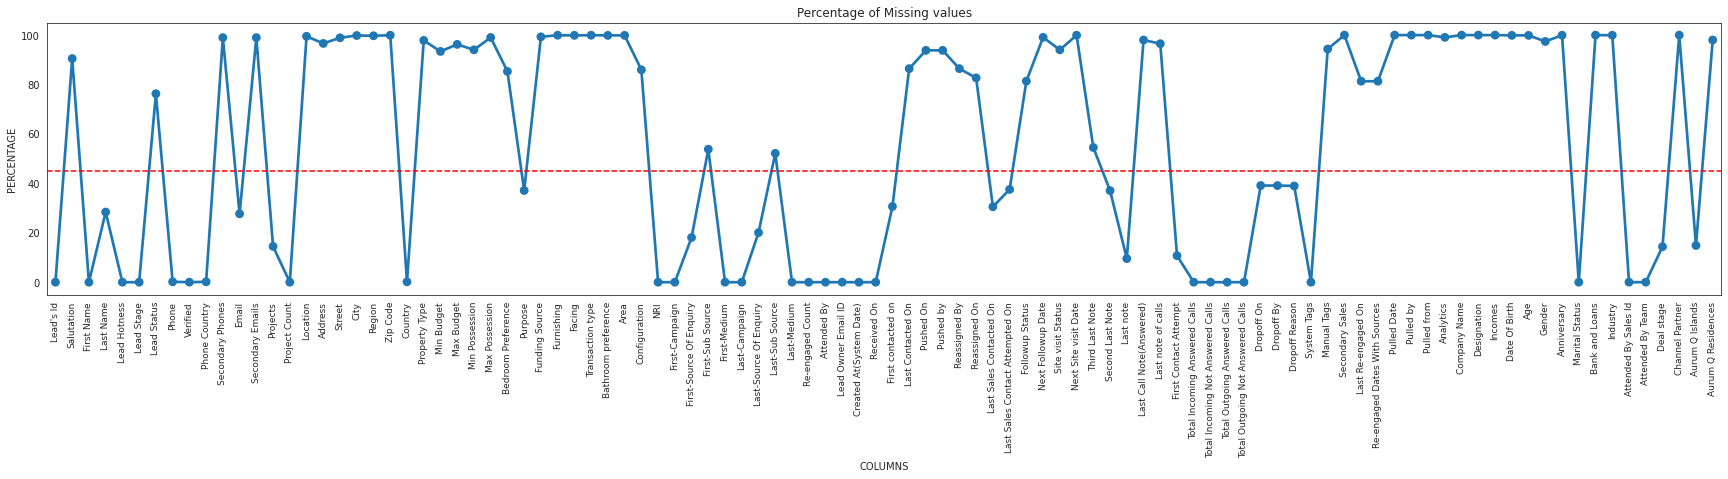

In [ ]:
#plotting the null value percentage
sns.set_style("white")
fig = plt.figure(figsize=(30,5))
null_lead = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
ax = sns.pointplot("index",0,data=null_lead)
plt.xticks(rotation =90,fontsize =9)
ax.axhline(45, ls='--',color='red')
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

In [ ]:
Row_Null50_Count = len(df[df.isnull().sum(axis=1)/df.shape[1]>0.5])
print( 'Total percentage of rows with more than 50% null values are : ', Row_Null50_Count *100 /1864 )
print("Total number of duplicate values in Lead's Id column :" , df.duplicated(subset = "Lead's Id").sum())

Total percentage of rows with more than 50% null values are :  94.58154506437768
Total number of duplicate values in Lead's Id column : 0


In [ ]:
# NaN value in percentage %
print((df.apply(lambda x: (sum(x.isnull()))*100/1864,axis=0).to_string()))

Lead's Id                              0.000000
Salutation                            90.504292
First Name                             0.000000
Last Name                             28.379828
Lead Hotness                           0.000000
Lead Stage                             0.000000
Lead Status                           76.287554
Phone                                  0.160944
Verified                               0.000000
Phone Country                          0.160944
Secondary Phones                      98.980687
Email                                 27.682403
Secondary Emails                      98.980687
Projects                              14.484979
Project Count                          0.000000
Location                              99.517167
Address                               96.620172
Street                                98.927039
City                                  99.839056
Region                                99.731760
Zip Code                              99

In [ ]:
df_c = df.copy()
cols_to_drop=['Secondary Phones','Secondary Emails','Location','Address','Street','City','Region','Zip Code','Max Possession','Property Type',
                'Funding Source', 'Furnishing','Facing','Transaction type','Bathroom preference','Area', 'Next Followup Date','Next Site visit Date','Date Of Birth',
                'Secondary Sales','Analytics','Pulled Date','Pulled by','Pulled from','Company Name','Designation','Incomes','Bank and Loans','Channel Partner',
                'Age','Anniversary','Industry',"Lead's Id","First Name","Last Name","Phone","Email","Created At(System Date)",
              "Received On","First contacted on","Last Contacted On","Pushed On","Reassigned On","Last Sales Contacted On","Last Sales Contact Attempted On",
              "Third Last Note","Second Last Note","Last note","Last Call Note(Answered)","Last note of calls","First Contact Attempt","Dropoff On",
              "System Tags","Last Re-engaged On","Re-engaged Dates With Sources","Salutation",
              "Min Budget","Min Possession","Max Budget","Pushed by","Site visit Status","Manual Tags","Gender","Aurum Q Residences","Verified",
              "Phone Country", "Country",'NRI', 'Purpose','Lead Owner Email ID', 'Marital Status','Aurum Q Islands',"Projects", "Configuration", 
              "First-Sub Source", "Last-Sub Source","Deal stage"]
df_c.drop(cols_to_drop, 1, inplace = True)

features_obj = df_c.columns 
# print(features_obj)
for f in features_obj:
  print(f)
  print(np.unique(df_c[f].astype(str).values))
  print('=========================================================================================== \n')

Lead Hotness
['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '28' '29' '3' '30' '31' '32' '33' '34' '35' '38'
 '39' '4' '45' '46' '5' '50' '51' '55' '6' '60' '62' '7' '8' '83' '9']

Lead Stage
['Booked' 'Follow Up' 'Incoming' 'Lost' 'New Lead' 'Non Contactable'
 'Prospect' 'Revisit Done' 'Scheduled Site Visit' 'Scheduled Site Visit '
 'Site Visit Done' 'Unqualified']

Lead Status
['Cold' 'Hot' 'Warm' 'nan']

Project Count
['0' '1' '2']

Bedroom Preference
['1 Bhk' '1 Bhk, 2 Bhk' '1 Bhk, 2 Bhk, 3 Bhk' '2 Bhk' '2 Bhk, 1 Bhk'
 '2 Bhk, 3 Bhk' '2 Bhk, 3 Bhk, 1 Bhk' '2 Bhk, 3 Bhk, 4 Bhk'
 '2 Bhk, 3.5 Bhk' '3 Bhk' '3 Bhk, 4 Bhk' '3.5 Bhk' '3.5 Bhk, 1 Bhk, 2 Bhk'
 '3.5 Bhk, 2 Bhk' '3.5 Bhk, 4.5 Bhk' '3.5 Bhk, 4.5 Bhk, 2 Bhk' '4 Bhk'
 '4.5 Bhk' 'nan']

First-Campaign
['Affiliate' 'Facebook Campaigns' 'HNI Data' 'Online Campaigns' 'Other'
 'Property Portals' 'channel_partner' 'organic' 'walkin']

First-Source Of Enquiry
['99acres' 'affiliate' 'b

In [ ]:
df_c.columns

Index(['Lead Hotness', 'Lead Stage', 'Lead Status', 'Project Count',
       'Bedroom Preference', 'First-Campaign', 'First-Source Of Enquiry',
       'First-Medium', 'Last-Campaign', 'Last-Source Of Enquiry',
       'Last-Medium', 'Re-engaged Count', 'Attended By', 'Reassigned By',
       'Followup Status', 'Total Incoming Answered Calls',
       'Total Incoming Not Answered Calls', 'Total Outgoing Answered Calls',
       'Total Outgoing Not Answered Calls', 'Dropoff By', 'Dropoff Reason',
       'Attended By Sales Id', 'Attended By Team'],
      dtype='object')

In [ ]:
# NaN value in percentage %
print((df_c.apply(lambda x: (sum(x.isnull()))*100/1864,axis=0).to_string()))

Lead Hotness                          0.000000
Lead Stage                            0.000000
Lead Status                          76.287554
Project Count                         0.000000
Bedroom Preference                   85.300429
First-Campaign                        0.000000
First-Source Of Enquiry              18.079399
First-Medium                          0.000000
Last-Campaign                         0.000000
Last-Source Of Enquiry               20.064378
Last-Medium                           0.000000
Re-engaged Count                      0.000000
Attended By                           0.000000
Reassigned By                        86.427039
Followup Status                      81.384120
Total Incoming Answered Calls         0.000000
Total Incoming Not Answered Calls     0.000000
Total Outgoing Answered Calls         0.000000
Total Outgoing Not Answered Calls     0.000000
Dropoff By                           39.109442
Dropoff Reason                       38.948498
Attended By S

In [ ]:
# filling null values with the most occuring one
df_c = df_c.apply(lambda x:x.fillna(x.value_counts().index[0]))
df_c

,Lead Hotness,Lead Stage,Lead Status,Project Count,Bedroom Preference,First-Campaign,First-Source Of Enquiry,First-Medium,Last-Campaign,Last-Source Of Enquiry,Last-Medium,Re-engaged Count,Attended By,Reassigned By,Followup Status,Total Incoming Answered Calls,Total Incoming Not Answered Calls,Total Outgoing Answered Calls,Total Outgoing Not Answered Calls,Dropoff By,Dropoff Reason,Attended By Sales Id,Attended By Team
0,9,Unqualified,Cold,1,2 Bhk,Property Portals,housing,bulk_upload,organic,housing,9.18E+11,1,Cx 2,Cx 3,Conducted,0,1,1,2,Cx 2,Location Mismatch,60a3ca954443ae32285d4c78,Presales Team
1,5,Non Contactable,Cold,1,2 Bhk,Property Portals,housing,bulk_upload,organic,housing,9.18E+11,1,Cx 2,Cx 3,Conducted,1,5,0,8,Cx 1,Not Interested,60a3ca954443ae32285d4c78,Presales Team
2,11,Unqualified,Cold,1,2 Bhk,Property Portals,housing,bulk_upload,organic,housing,9.18E+11,1,Cx 2,Cx 3,Conducted,1,1,0,1,Cx 2,Invalid Customer Contact Number,60a3ca954443ae32285d4c78,Presales Team
3,10,Unqualified,Cold,1,2 Bhk,Property Portals,housing,bulk_upload,organic,housing,9.18E+11,1,Cx 2,Cx 3,Conducted,1,0,0,1,Cx 2,Not Interested,60a3ca954443ae32285d4c78,Presales Team
4,10,Unqualified,Cold,1,2 Bhk,Property Portals,housing,bulk_upload,organic,housing,9.18E+11,1,Cx 2,Cx 3,Conducted,0,4,1,1,Cx 2,Not Interested,60a3ca954443ae32285d4c78,Presales Team
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1859,11,Prospect,Cold,1,"3.5 Bhk, 4.5 Bhk, 2 Bhk",walkin,reference,mobile_app,walkin,reference,mobile_app,0,Pooja Kadam,Cx 3,Conducted,0,0,0,0,Cx 1,Not Interested,60b492b54443ae2683f4227e,Sales Team
1860,15,Unqualified,Cold,1,2 Bhk,Online Campaigns,digital_direct,web_login,Online Campaigns,digital_direct,web_login,0,Cx 1,Cx 3,Conducted,0,0,1,1,Cx 1,Is A Channel Partner,60a3caf34443ae323e5d31b7,Presales Team
1861,10,New Lead,Cold,0,2 Bhk,organic,housing,9.18E+11,organic,housing,9.18E+11,0,Cx 3,Cx 3,Conducted,0,1,0,0,Cx 1,Not Interested,60ab553aed23e95e0d435230,Presales Team
1862,12,Prospect,Cold,1,2 Bhk,walkin,walkin,mobile_app,walkin,walkin,mobile_app,0,Reshma Panda,Cx 3,Conducted,0,0,0,0,Cx 1,Not Interested,60b492674443ae0a51b9b285,Sales Team


In [ ]:
# NaN value in percentage %
print((df_c.apply(lambda x: (sum(x.isnull()))*100/1864,axis=0).to_string()))

Lead Hotness                         0.0
Lead Stage                           0.0
Lead Status                          0.0
Project Count                        0.0
Bedroom Preference                   0.0
First-Campaign                       0.0
First-Source Of Enquiry              0.0
First-Medium                         0.0
Last-Campaign                        0.0
Last-Source Of Enquiry               0.0
Last-Medium                          0.0
Re-engaged Count                     0.0
Attended By                          0.0
Reassigned By                        0.0
Followup Status                      0.0
Total Incoming Answered Calls        0.0
Total Incoming Not Answered Calls    0.0
Total Outgoing Answered Calls        0.0
Total Outgoing Not Answered Calls    0.0
Dropoff By                           0.0
Dropoff Reason                       0.0
Attended By Sales Id                 0.0
Attended By Team                     0.0


In [ ]:
for f in features_obj:
  print(f)
  print(np.unique(df_c[f].astype(str).values))
  print('=========================================================================================== \n')

Lead Hotness
['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '28' '29' '3' '30' '31' '32' '33' '34' '35' '38'
 '39' '4' '45' '46' '5' '50' '51' '55' '6' '60' '62' '7' '8' '83' '9']

Lead Stage
['Booked' 'Follow Up' 'Incoming' 'Lost' 'New Lead' 'Non Contactable'
 'Prospect' 'Revisit Done' 'Scheduled Site Visit' 'Scheduled Site Visit '
 'Site Visit Done' 'Unqualified']

Lead Status
['Cold' 'Hot' 'Warm']

Project Count
['0' '1' '2']

Bedroom Preference
['1 Bhk' '1 Bhk, 2 Bhk' '1 Bhk, 2 Bhk, 3 Bhk' '2 Bhk' '2 Bhk, 1 Bhk'
 '2 Bhk, 3 Bhk' '2 Bhk, 3 Bhk, 1 Bhk' '2 Bhk, 3 Bhk, 4 Bhk'
 '2 Bhk, 3.5 Bhk' '3 Bhk' '3 Bhk, 4 Bhk' '3.5 Bhk' '3.5 Bhk, 1 Bhk, 2 Bhk'
 '3.5 Bhk, 2 Bhk' '3.5 Bhk, 4.5 Bhk' '3.5 Bhk, 4.5 Bhk, 2 Bhk' '4 Bhk'
 '4.5 Bhk']

First-Campaign
['Affiliate' 'Facebook Campaigns' 'HNI Data' 'Online Campaigns' 'Other'
 'Property Portals' 'channel_partner' 'organic' 'walkin']

First-Source Of Enquiry
['99acres' 'affiliate' 'broker' 'chat

In [ ]:
df_c.columns

Index(['Lead Hotness', 'Lead Stage', 'Lead Status', 'Project Count',
       'Bedroom Preference', 'First-Campaign', 'First-Source Of Enquiry',
       'First-Medium', 'Last-Campaign', 'Last-Source Of Enquiry',
       'Last-Medium', 'Re-engaged Count', 'Attended By', 'Reassigned By',
       'Followup Status', 'Total Incoming Answered Calls',
       'Total Incoming Not Answered Calls', 'Total Outgoing Answered Calls',
       'Total Outgoing Not Answered Calls', 'Dropoff By', 'Dropoff Reason',
       'Attended By Sales Id', 'Attended By Team'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


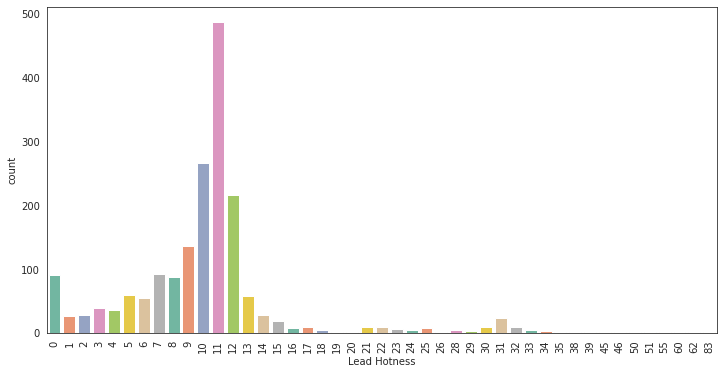

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


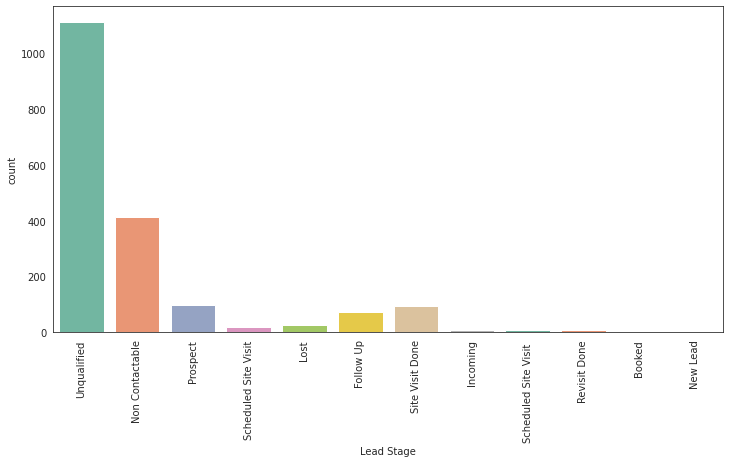

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


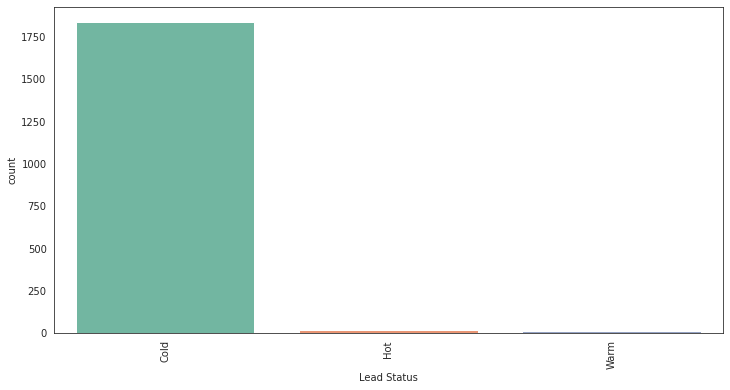

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


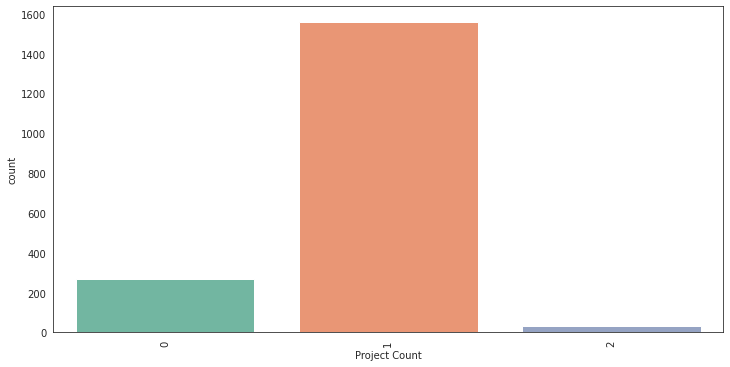

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


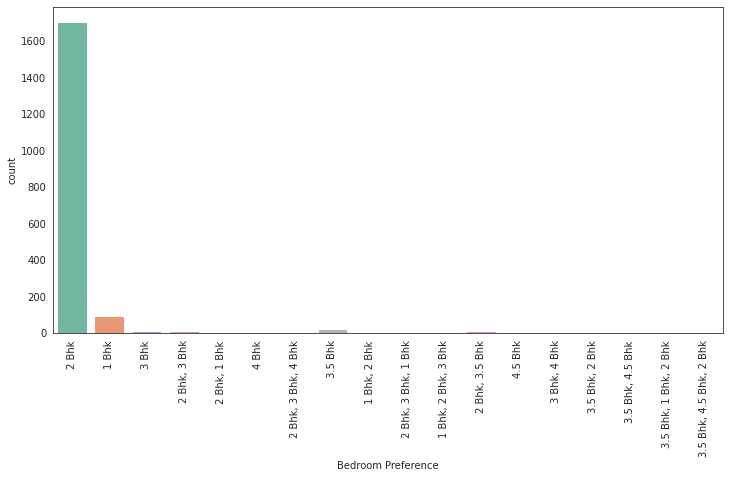

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


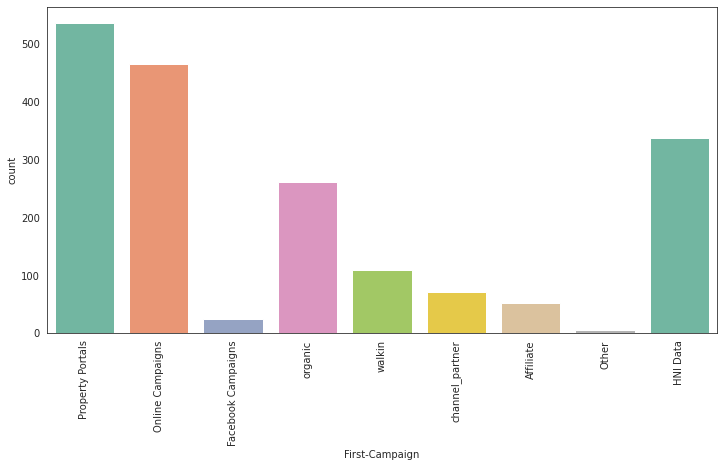

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


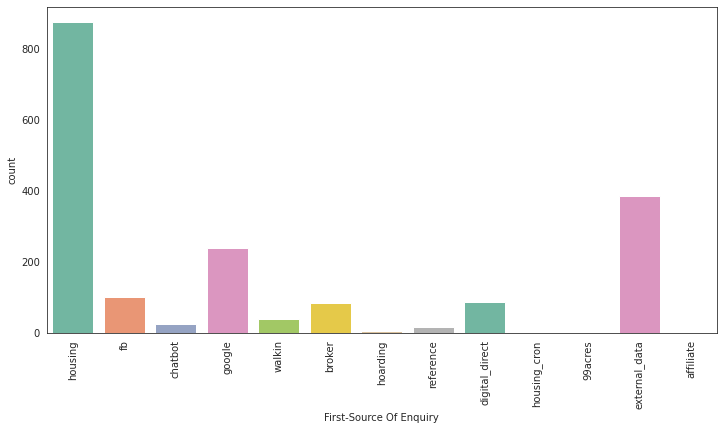

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


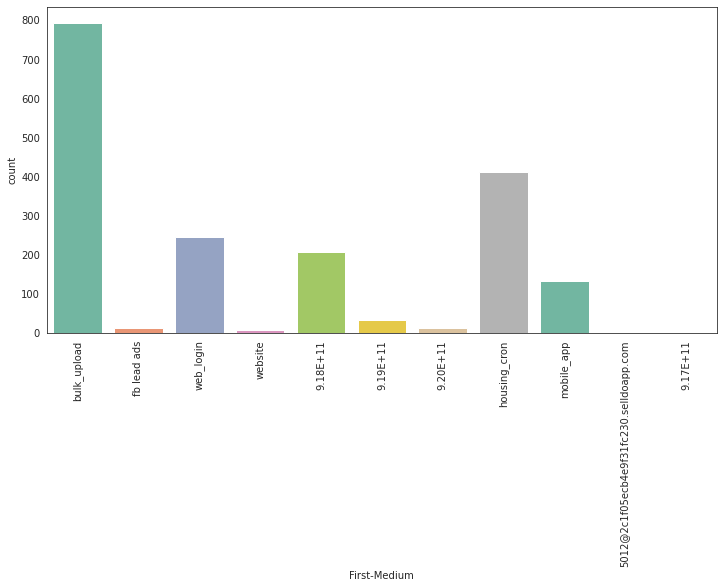

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


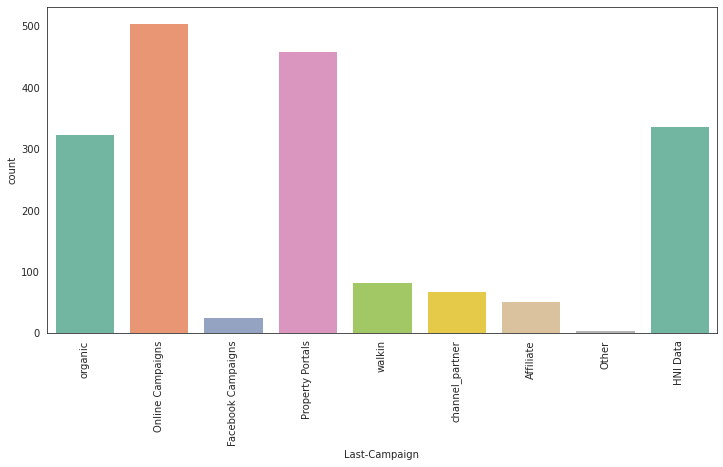

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


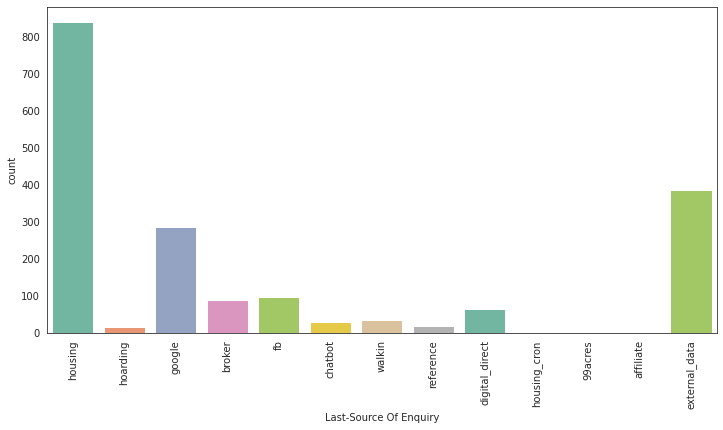

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


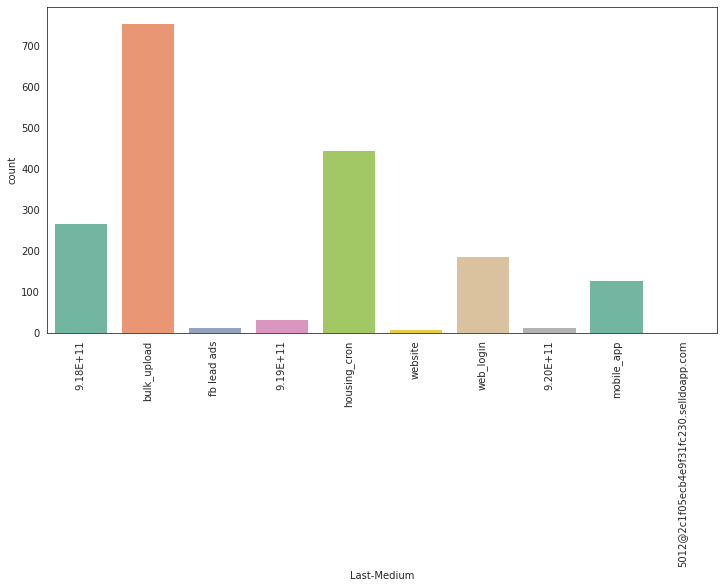

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


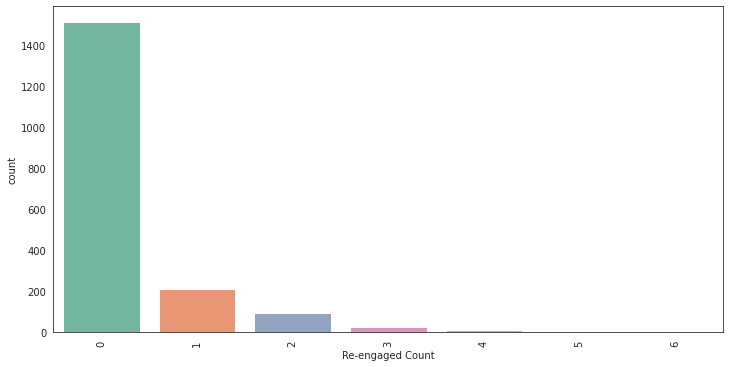

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


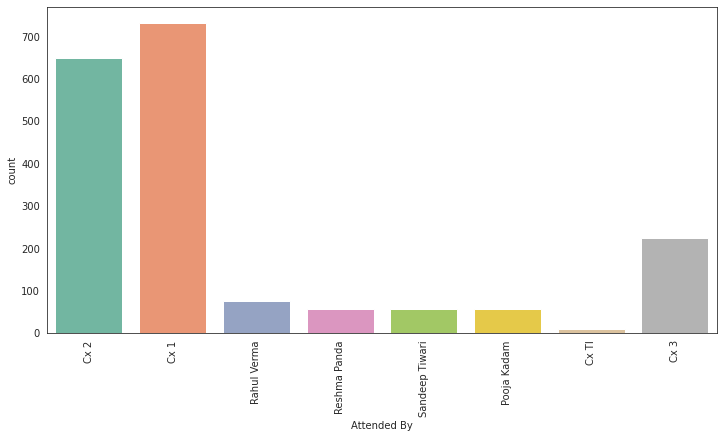

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


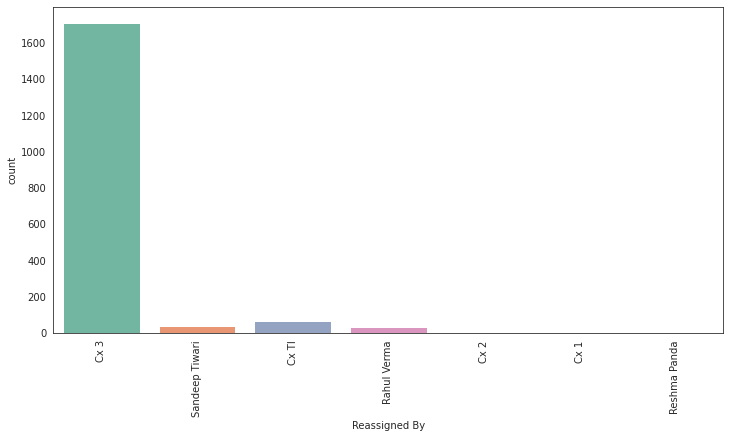

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


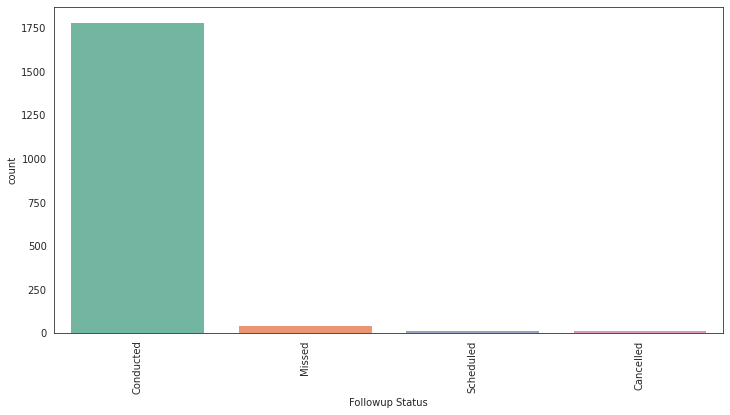

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


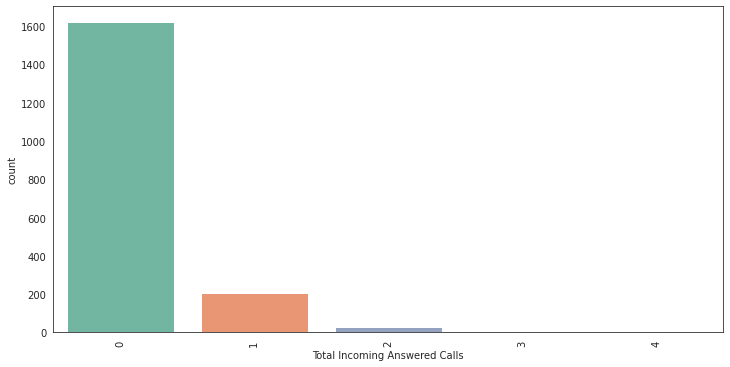

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


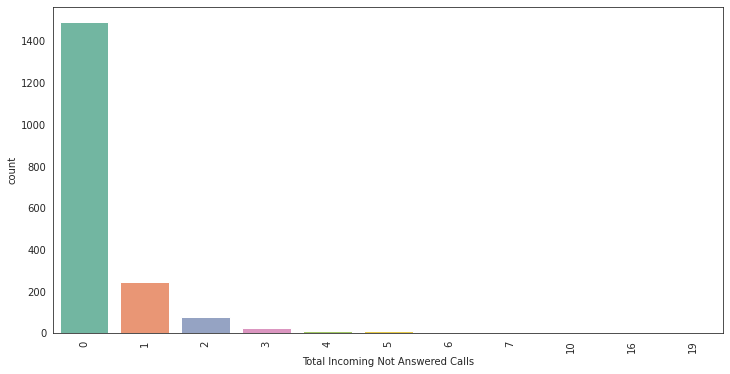

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


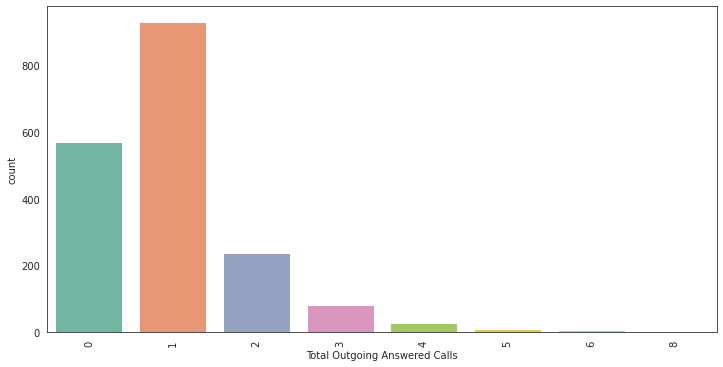

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


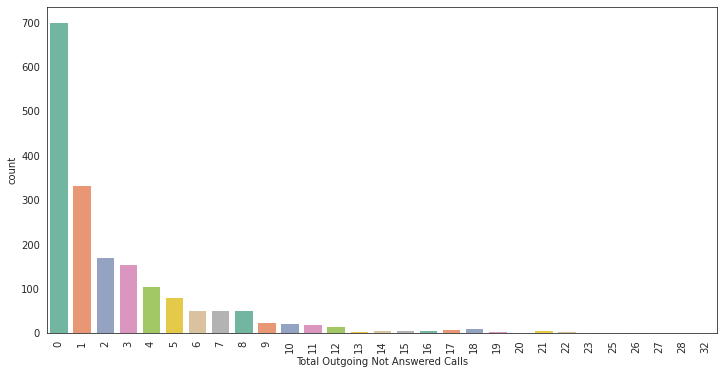

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


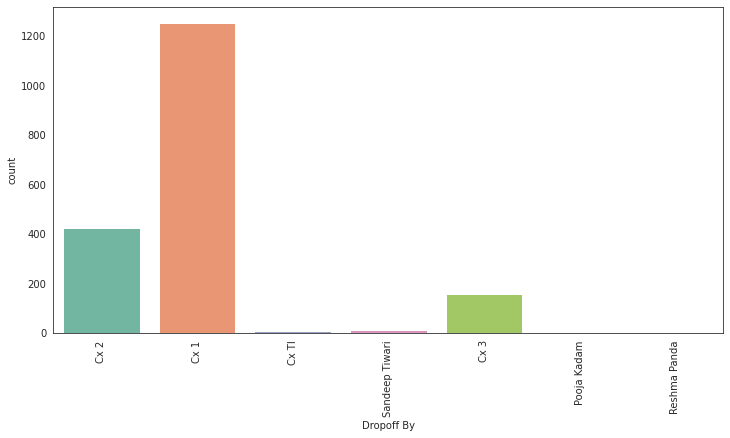

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


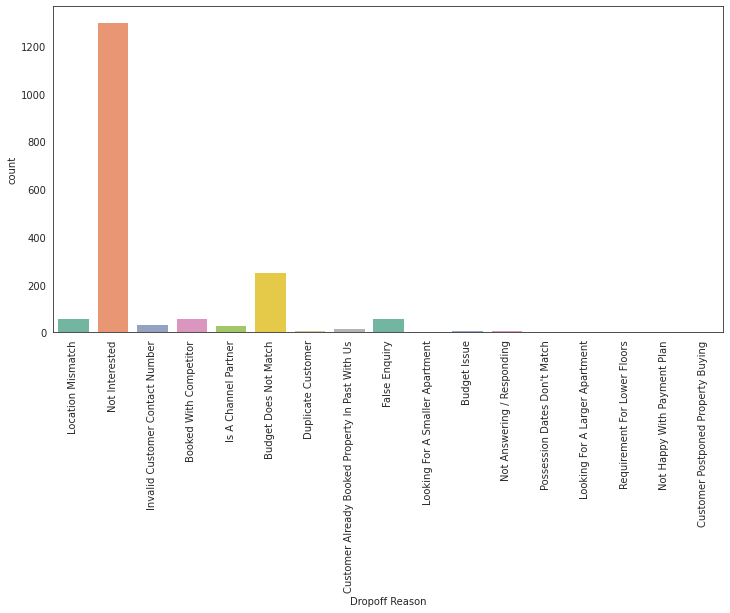

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


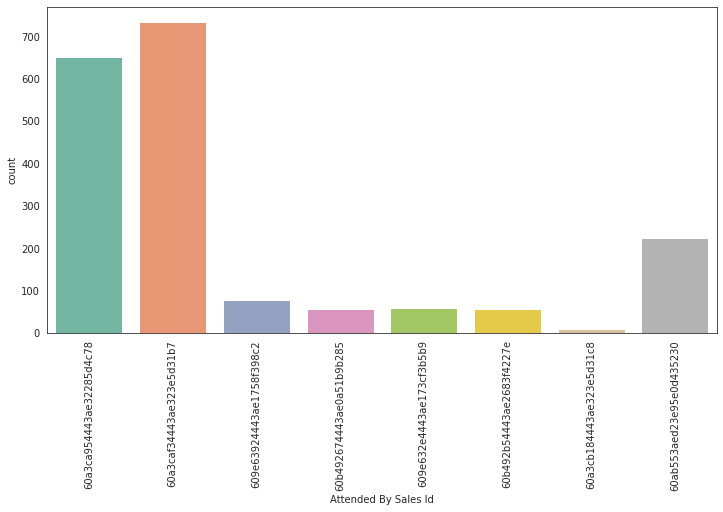

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


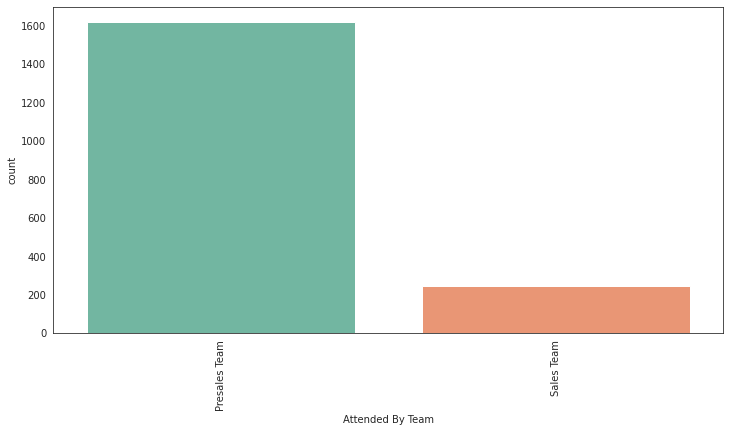

In [ ]:
for col in df_c.columns:
    plt.figure(figsize=(12,6))
    ax = sns.countplot(df_c[col],palette = 'Set2')
    plt.xticks(rotation = 90)
    plt.show()

#  Removing: "Lead Status, 'Bedroom Preference', 'First-Medium', 'Re-engaged Count', 'Reassigned By', 'Followup Status', 'Dropoff Reason'

In [ ]:
cols_to_drop=['Lead Status', 'Bedroom Preference', 'First-Medium', 'Re-engaged Count', 'Reassigned By', 'Followup Status', 'Dropoff Reason','Last-Medium']
df_c.drop(cols_to_drop, 1, inplace = True)



In [ ]:
print(f"Total Number of columns is: {len(df_c.columns)}")
features_obj = df_c.columns 

for f in features_obj:
  print(f)
  print(np.unique(df_c[f].astype(str).values))
  print('=========================================================================================== \n')

Total Number of columns is: 15
Lead Hotness
['0' '1' '10' '11' '12' '13' '14' '15' '16' '17' '18' '19' '2' '20' '21'
 '22' '23' '24' '25' '26' '28' '29' '3' '30' '31' '32' '33' '34' '35' '38'
 '39' '4' '45' '46' '5' '50' '51' '55' '6' '60' '62' '7' '8' '83' '9']

Lead Stage
['Booked' 'Follow Up' 'Incoming' 'Lost' 'New Lead' 'Non Contactable'
 'Prospect' 'Revisit Done' 'Scheduled Site Visit' 'Scheduled Site Visit '
 'Site Visit Done' 'Unqualified']

Project Count
['0' '1' '2']

First-Campaign
['Affiliate' 'Facebook Campaigns' 'HNI Data' 'Online Campaigns' 'Other'
 'Property Portals' 'channel_partner' 'organic' 'walkin']

First-Source Of Enquiry
['99acres' 'affiliate' 'broker' 'chatbot' 'digital_direct' 'external_data'
 'fb' 'google' 'hoarding' 'housing' 'housing_cron' 'reference' 'walkin']

Last-Campaign
['Affiliate' 'Facebook Campaigns' 'HNI Data' 'Online Campaigns' 'Other'
 'Property Portals' 'channel_partner' 'organic' 'walkin']

Last-Source Of Enquiry
['99acres' 'affiliate' 'broker'

In [ ]:
# Checking the unique value counts for categorcial columns
df_c.nunique().sort_values()

Attended By Team                      2
Project Count                         3
Total Incoming Answered Calls         5
Dropoff By                            7
Attended By                           8
Total Outgoing Answered Calls         8
Attended By Sales Id                  8
First-Campaign                        9
Last-Campaign                         9
Total Incoming Not Answered Calls    11
Lead Stage                           12
First-Source Of Enquiry              13
Last-Source Of Enquiry               13
Total Outgoing Not Answered Calls    29
Lead Hotness                         45
dtype: int64

In [ ]:
# Checking the categorical values feature
df_c['Lead Hotness'].value_counts()

11    487
10    267
12    217
9     137
7      93
0      91
8      88
5      60
13     58
6      55
3      40
4      36
2      29
14     28
1      26
31     24
15     19
17     10
22     10
32      9
21      9
30      9
16      8
25      8
23      6
18      5
28      4
24      4
33      4
34      3
29      3
26      2
35      2
39      2
46      1
60      1
55      1
51      1
50      1
20      1
45      1
38      1
19      1
62      1
83      1
Name: Lead Hotness, dtype: int64

In [ ]:
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Lead Hotness                       1864 non-null   int64 
 1   Lead Stage                         1864 non-null   object
 2   Project Count                      1864 non-null   int64 
 3   First-Campaign                     1864 non-null   object
 4   First-Source Of Enquiry            1864 non-null   object
 5   Last-Campaign                      1864 non-null   object
 6   Last-Source Of Enquiry             1864 non-null   object
 7   Attended By                        1864 non-null   object
 8   Total Incoming Answered Calls      1864 non-null   int64 
 9   Total Incoming Not Answered Calls  1864 non-null   int64 
 10  Total Outgoing Answered Calls      1864 non-null   int64 
 11  Total Outgoing Not Answered Calls  1864 non-null   int64 
 12  Dropof

In [ ]:
categorical_col = df_c.select_dtypes(exclude =["number"]).columns.values
numerical_col = df_c.select_dtypes(include =["number"]).columns.values
print("CATEGORICAL FEATURES : \n {} \n\n".format(categorical_col))
print("NUMERICAL FEATURES : \n {} ".format(numerical_col))

CATEGORICAL FEATURES : 
 ['Lead Stage' 'First-Campaign' 'First-Source Of Enquiry' 'Last-Campaign'
 'Last-Source Of Enquiry' 'Attended By' 'Dropoff By'
 'Attended By Sales Id' 'Attended By Team'] 


NUMERICAL FEATURES : 
 ['Lead Hotness' 'Project Count' 'Total Incoming Answered Calls'
 'Total Incoming Not Answered Calls' 'Total Outgoing Answered Calls'
 'Total Outgoing Not Answered Calls'] 


In [ ]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(df_c[['Lead Stage', 'First-Campaign', 'First-Source Of Enquiry', 'Last-Campaign',
 'Last-Source Of Enquiry', 'Attended By', 'Dropoff By',
 'Attended By Sales Id', 'Attended By Team']], drop_first=True)

# Adding the results to the master dataframe
df_c = pd.concat([df_c, dummy1], axis=1)

df_c.head()

,Lead Hotness,Lead Stage,Project Count,First-Campaign,First-Source Of Enquiry,Last-Campaign,Last-Source Of Enquiry,Attended By,Total Incoming Answered Calls,Total Incoming Not Answered Calls,Total Outgoing Answered Calls,Total Outgoing Not Answered Calls,Dropoff By,Attended By Sales Id,Attended By Team,Lead Stage_Follow Up,Lead Stage_Incoming,Lead Stage_Lost,Lead Stage_New Lead,Lead Stage_Non Contactable,Lead Stage_Prospect,Lead Stage_Revisit Done,Lead Stage_Scheduled Site Visit,Lead Stage_Scheduled Site Visit,Lead Stage_Site Visit Done,Lead Stage_Unqualified,First-Campaign_Facebook Campaigns,First-Campaign_HNI Data,First-Campaign_Online Campaigns,First-Campaign_Other,First-Campaign_Property Portals,First-Campaign_channel_partner,First-Campaign_organic,First-Campaign_walkin,First-Source Of Enquiry_affiliate,First-Source Of Enquiry_broker,First-Source Of Enquiry_chatbot,First-Source Of Enquiry_digital_direct,First-Source Of Enquiry_external_data,First-Source Of Enquiry_fb,...,Last-Campaign_HNI Data,Last-Campaign_Online Campaigns,Last-Campaign_Other,Last-Campaign_Property Portals,Last-Campaign_channel_partner,Last-Campaign_organic,Last-Campaign_walkin,Last-Source Of Enquiry_affiliate,Last-Source Of Enquiry_broker,Last-Source Of Enquiry_chatbot,Last-Source Of Enquiry_digital_direct,Last-Source Of Enquiry_external_data,Last-Source Of Enquiry_fb,Last-Source Of Enquiry_google,Last-Source Of Enquiry_hoarding,Last-Source Of Enquiry_housing,Last-Source Of Enquiry_housing_cron,Last-Source Of Enquiry_reference,Last-Source Of Enquiry_walkin,Attended By_Cx 2,Attended By_Cx 3,Attended By_Cx Tl,Attended By_Pooja Kadam,Attended By_Rahul Verma,Attended By_Reshma Panda,Attended By_Sandeep Tiwari,Dropoff By_Cx 2,Dropoff By_Cx 3,Dropoff By_Cx Tl,Dropoff By_Pooja Kadam,Dropoff By_Reshma Panda,Dropoff By_Sandeep Tiwari,Attended By Sales Id_609e63924443ae1758f398c2,Attended By Sales Id_60a3ca954443ae32285d4c78,Attended By Sales Id_60a3caf34443ae323e5d31b7,Attended By Sales Id_60a3cb184443ae323e5d31c8,Attended By Sales Id_60ab553aed23e95e0d435230,Attended By Sales Id_60b492674443ae0a51b9b285,Attended By Sales Id_60b492b54443ae2683f4227e,Attended By Team_Sales Team
0,9,Unqualified,1,Property Portals,housing,organic,housing,Cx 2,0,1,1,2,Cx 2,60a3ca954443ae32285d4c78,Presales Team,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
1,5,Non Contactable,1,Property Portals,housing,organic,housing,Cx 2,1,5,0,8,Cx 1,60a3ca954443ae32285d4c78,Presales Team,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,11,Unqualified,1,Property Portals,housing,organic,housing,Cx 2,1,1,0,1,Cx 2,60a3ca954443ae32285d4c78,Presales Team,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
3,10,Unqualified,1,Property Portals,housing,organic,housing,Cx 2,1,0,0,1,Cx 2,60a3ca954443ae32285d4c78,Presales Team,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
4,10,Unqualified,1,Property Portals,housing,organic,housing,Cx 2,0,4,1,1,Cx 2,60a3ca954443ae32285d4c78,Presales Team,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# We have created dummies for the below variables, so we can drop them
df_c = df_c.drop(['Lead Stage', 'First-Campaign', 'First-Source Of Enquiry', 'Last-Campaign',
 'Last-Source Of Enquiry', 'Attended By', 'Dropoff By',
 'Attended By Sales Id', 'Attended By Team'], axis=1)
df_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864 entries, 0 to 1863
Data columns (total 78 columns):
 #   Column                                         Non-Null Count  Dtype
---  ------                                         --------------  -----
 0   Lead Hotness                                   1864 non-null   int64
 1   Project Count                                  1864 non-null   int64
 2   Total Incoming Answered Calls                  1864 non-null   int64
 3   Total Incoming Not Answered Calls              1864 non-null   int64
 4   Total Outgoing Answered Calls                  1864 non-null   int64
 5   Total Outgoing Not Answered Calls              1864 non-null   int64
 6   Lead Stage_Follow Up                           1864 non-null   uint8
 7   Lead Stage_Incoming                            1864 non-null   uint8
 8   Lead Stage_Lost                                1864 non-null   uint8
 9   Lead Stage_New Lead                            1864 non-null   uint8
 10  

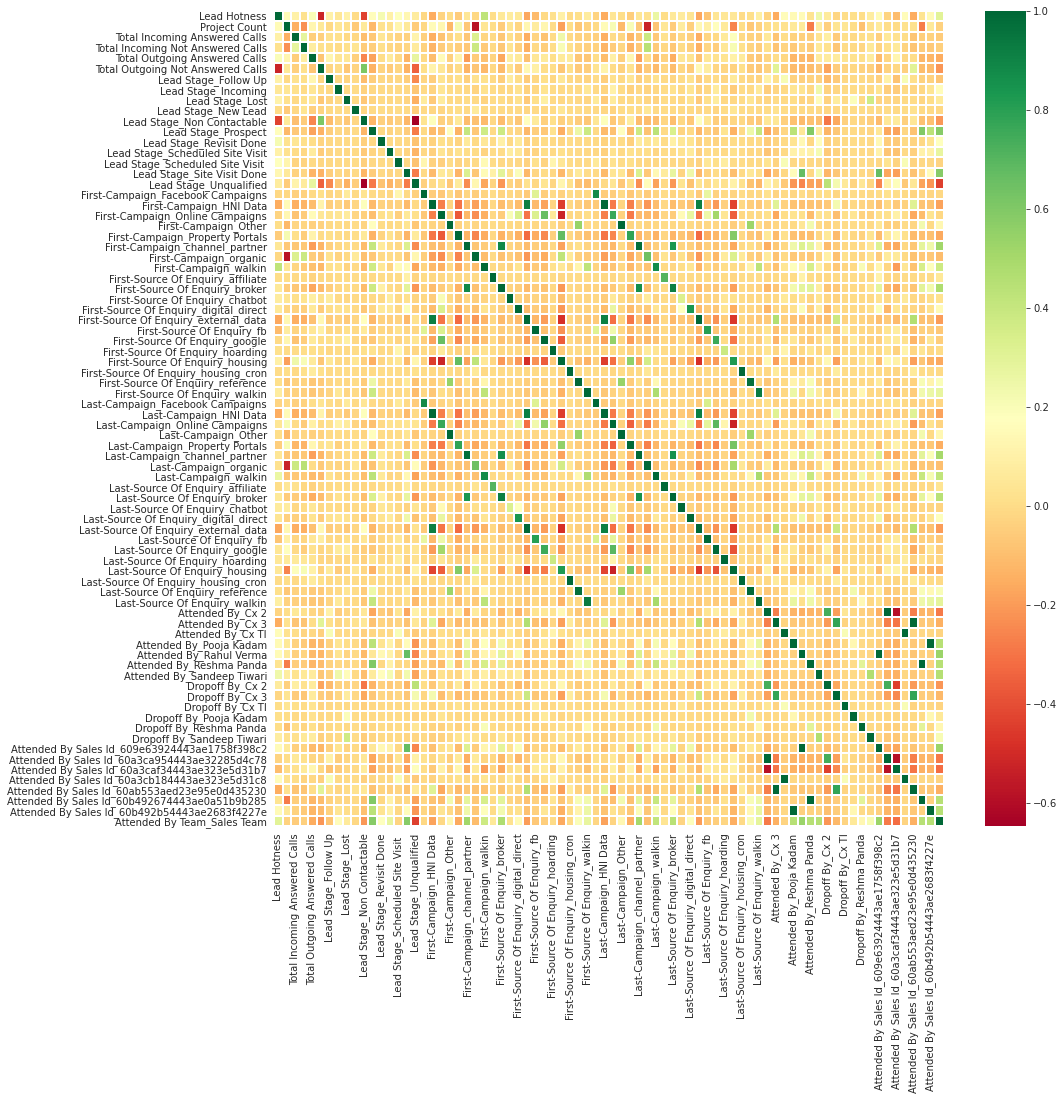

In [ ]:
# Visualizing the data using heatmap
plt.figure(figsize=[15,15])
sns.heatmap(df_c.corr(), cmap="RdYlGn",linewidth =1)
plt.show()

In [ ]:
print('Total number of columns after One-Hot Encoding : ',len(df_c.columns))

Total number of columns after One-Hot Encoding :  78


In [ ]:
corr_lead = df_c.corr()
corr_lead = corr_lead.where(np.triu(np.ones(corr_lead.shape),k=1).astype(np.bool))
corr_df = corr_lead.unstack().reset_index()
corr_df.columns =['VAR1','VAR2','Correlation']
corr_df.dropna(subset = ["Correlation"], inplace = True) 
corr_df.sort_values(by='Correlation', ascending=False, inplace=True)

# Top 5 Positive correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
5595,Attended By Sales Id_60a3ca954443ae32285d4c78,Attended By_Cx 2,1.0
4246,Last-Source Of Enquiry_housing_cron,First-Source Of Enquiry_housing_cron,1.0
5988,Attended By Sales Id_60b492b54443ae2683f4227e,Attended By_Pooja Kadam,1.0
3851,Last-Source Of Enquiry_external_data,First-Source Of Enquiry_external_data,1.0
3140,Last-Campaign_Other,First-Campaign_Other,1.0


In [ ]:
corr_df.sort_values(by='Correlation', ascending=True, inplace=True)

# Top 5 Negatively correlated variables
corr_df.head(5)

,VAR1,VAR2,Correlation
1258,Lead Stage_Unqualified,Lead Stage_Non Contactable,-0.647752
5673,Attended By Sales Id_60a3caf34443ae323e5d31b7,Attended By_Cx 2,-0.589072
5687,Attended By Sales Id_60a3caf34443ae323e5d31b7,Attended By Sales Id_60a3ca954443ae32285d4c78,-0.589072
1795,First-Campaign_organic,Project Count,-0.582940
4173,Last-Source Of Enquiry_housing,Last-Campaign_Online Campaigns,-0.528013


In [ ]:
from sklearn.model_selection import train_test_split
# target variable
Y = df_c['Lead Hotness']
X = df_c.drop(['Lead Hotness'], axis=1)

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.2, random_state=100)

In [ ]:
#Checking the shape of the created Train & Test DFs
print(" Shape of X_train is : ",X_train.shape)
print(" Shape of y_train is : ",y_train.shape)
print(" Shape of X_test is  : ",X_test.shape)
print(" Shape of y_test is  : ",y_test.shape)

 Shape of X_train is :  (1304, 77)
 Shape of y_train is :  (1304,)
 Shape of X_test is  :  (373, 77)
 Shape of y_test is  :  (373,)


### Feature Scaling: We standardized the numeric attributes so they have a common mean of zero, if they were measured on different scales

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train[[ 'Project Count', 'Total Incoming Answered Calls','Total Incoming Not Answered Calls', 'Total Outgoing Answered Calls'
 ,'Total Outgoing Not Answered Calls']] = scaler.fit_transform(X_train[['Project Count', 'Total Incoming Answered Calls','Total Incoming Not Answered Calls', 'Total Outgoing Answered Calls'
 ,'Total Outgoing Not Answered Calls']])
X_train.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1734: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


,Project Count,Total Incoming Answered Calls,Total Incoming Not Answered Calls,Total Outgoing Answered Calls,Total Outgoing Not Answered Calls,Lead Stage_Follow Up,Lead Stage_Incoming,Lead Stage_Lost,Lead Stage_New Lead,Lead Stage_Non Contactable,Lead Stage_Prospect,Lead Stage_Revisit Done,Lead Stage_Scheduled Site Visit,Lead Stage_Scheduled Site Visit,Lead Stage_Site Visit Done,Lead Stage_Unqualified,First-Campaign_Facebook Campaigns,First-Campaign_HNI Data,First-Campaign_Online Campaigns,First-Campaign_Other,First-Campaign_Property Portals,First-Campaign_channel_partner,First-Campaign_organic,First-Campaign_walkin,First-Source Of Enquiry_affiliate,First-Source Of Enquiry_broker,First-Source Of Enquiry_chatbot,First-Source Of Enquiry_digital_direct,First-Source Of Enquiry_external_data,First-Source Of Enquiry_fb,First-Source Of Enquiry_google,First-Source Of Enquiry_hoarding,First-Source Of Enquiry_housing,First-Source Of Enquiry_housing_cron,First-Source Of Enquiry_reference,First-Source Of Enquiry_walkin,Last-Campaign_Facebook Campaigns,Last-Campaign_HNI Data,Last-Campaign_Online Campaigns,Last-Campaign_Other,Last-Campaign_Property Portals,Last-Campaign_channel_partner,Last-Campaign_organic,Last-Campaign_walkin,Last-Source Of Enquiry_affiliate,Last-Source Of Enquiry_broker,Last-Source Of Enquiry_chatbot,Last-Source Of Enquiry_digital_direct,Last-Source Of Enquiry_external_data,Last-Source Of Enquiry_fb,Last-Source Of Enquiry_google,Last-Source Of Enquiry_hoarding,Last-Source Of Enquiry_housing,Last-Source Of Enquiry_housing_cron,Last-Source Of Enquiry_reference,Last-Source Of Enquiry_walkin,Attended By_Cx 2,Attended By_Cx 3,Attended By_Cx Tl,Attended By_Pooja Kadam,Attended By_Rahul Verma,Attended By_Reshma Panda,Attended By_Sandeep Tiwari,Dropoff By_Cx 2,Dropoff By_Cx 3,Dropoff By_Cx Tl,Dropoff By_Pooja Kadam,Dropoff By_Reshma Panda,Dropoff By_Sandeep Tiwari,Attended By Sales Id_609e63924443ae1758f398c2,Attended By Sales Id_60a3ca954443ae32285d4c78,Attended By Sales Id_60a3caf34443ae323e5d31b7,Attended By Sales Id_60a3cb184443ae323e5d31c8,Attended By Sales Id_60ab553aed23e95e0d435230,Attended By Sales Id_60b492674443ae0a51b9b285,Attended By Sales Id_60b492b54443ae2683f4227e,Attended By Team_Sales Team
1741,0.318920,-0.339705,-0.371928,-1.074280,-0.673893,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
164,0.318920,-0.339705,-0.371928,-0.013022,-0.673893,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
188,0.318920,-0.339705,-0.371928,1.048237,-0.201189,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1483,0.318920,-0.339705,-0.371928,-0.013022,-0.201189,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1656,-2.248188,-0.339705,0.698699,-0.013022,-0.673893,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


## Model building

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

#statmodel libraries
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# Using RFE to reduce the feature count from 54 to 20
logreg = LogisticRegression()
rfe = RFE(logreg, 20)           
rfe = rfe.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [ ]:
#checking the output of RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Project Count', True, 1),
 ('Total Incoming Answered Calls', False, 18),
 ('Total Incoming Not Answered Calls', False, 8),
 ('Total Outgoing Answered Calls', True, 1),
 ('Total Outgoing Not Answered Calls', True, 1),
 ('Lead Stage_Follow Up', True, 1),
 ('Lead Stage_Incoming', False, 42),
 ('Lead Stage_Lost', False, 11),
 ('Lead Stage_New Lead', False, 49),
 ('Lead Stage_Non Contactable', True, 1),
 ('Lead Stage_Prospect', False, 17),
 ('Lead Stage_Revisit Done', False, 29),
 ('Lead Stage_Scheduled Site Visit', False, 19),
 ('Lead Stage_Scheduled Site Visit ', False, 41),
 ('Lead Stage_Site Visit Done', True, 1),
 ('Lead Stage_Unqualified', True, 1),
 ('First-Campaign_Facebook Campaigns', False, 26),
 ('First-Campaign_HNI Data', True, 1),
 ('First-Campaign_Online Campaigns', True, 1),
 ('First-Campaign_Other', False, 50),
 ('First-Campaign_Property Portals', True, 1),
 ('First-Campaign_channel_partner', False, 40),
 ('First-Campaign_organic', False, 4),
 ('First-Campaign_walkin', Tr

In [ ]:
#checking which columns remained after RFE
rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['Project Count', 'Total Outgoing Answered Calls',
       'Total Outgoing Not Answered Calls', 'Lead Stage_Follow Up',
       'Lead Stage_Non Contactable', 'Lead Stage_Site Visit Done',
       'Lead Stage_Unqualified', 'First-Campaign_HNI Data',
       'First-Campaign_Online Campaigns', 'First-Campaign_Property Portals',
       'First-Campaign_walkin', 'First-Source Of Enquiry_digital_direct',
       'First-Source Of Enquiry_google', 'First-Source Of Enquiry_housing',
       'Last-Campaign_organic', 'Last-Campaign_walkin',
       'Last-Source Of Enquiry_housing',
       'Attended By Sales Id_609e63924443ae1758f398c2',
       'Attended By Sales Id_60a3ca954443ae32285d4c78',
       'Attended By Team_Sales Team'],
      dtype='object')

In [ ]:
#Columns which have been removed after RFE
X_train.columns[~rfe.support_]

Index(['Total Incoming Answered Calls', 'Total Incoming Not Answered Calls',
       'Lead Stage_Incoming', 'Lead Stage_Lost', 'Lead Stage_New Lead',
       'Lead Stage_Prospect', 'Lead Stage_Revisit Done',
       'Lead Stage_Scheduled Site Visit', 'Lead Stage_Scheduled Site Visit ',
       'First-Campaign_Facebook Campaigns', 'First-Campaign_Other',
       'First-Campaign_channel_partner', 'First-Campaign_organic',
       'First-Source Of Enquiry_affiliate', 'First-Source Of Enquiry_broker',
       'First-Source Of Enquiry_chatbot',
       'First-Source Of Enquiry_external_data', 'First-Source Of Enquiry_fb',
       'First-Source Of Enquiry_hoarding',
       'First-Source Of Enquiry_housing_cron',
       'First-Source Of Enquiry_reference', 'First-Source Of Enquiry_walkin',
       'Last-Campaign_Facebook Campaigns', 'Last-Campaign_HNI Data',
       'Last-Campaign_Online Campaigns', 'Last-Campaign_Other',
       'Last-Campaign_Property Portals', 'Last-Campaign_channel_partner',
       '

In [ ]:
# Create a matrix to Print the Accuracy, Sensitivity and Specificity
def lg_metrics(confusion_matrix):
    TN =confusion_matrix[0,0]
    TP =confusion_matrix[1,1]
    FP =confusion_matrix[0,1]
    FN =confusion_matrix[1,0]
    accuracy = (TP+TN)/(TP+TN+FP+FN)
    speci = TN/(TN+FP)
    sensi = TP/(TP+FN)
    precision = TP/(TP+FP)
    recall = TP/(TP+FN)
    TPR = TP/(TP + FN)
    TNR = TN/(TN + FP)
    FPR = FP/(TN + FP)
    FNR = FN/(TP + FN)
    pos_pred_val = TP /(TP+FP)
    neg_pred_val = TN /(TN+FN)
    
    print ("Model Accuracy value is              : ", round(accuracy*100,2),"%")
    print ("Model Sensitivity value is           : ", round(sensi*100,2),"%")
    print ("Model Specificity value is           : ", round(speci*100,2),"%")
    print ("Model Precision value is             : ", round(precision*100,2),"%")
    print ("Model Recall value is                : ", round(recall*100,2),"%")
    print ("Model True Positive Rate (TPR)       : ", round(TPR*100,2),"%")
    print ("Model False Positive Rate (FPR)      : ", round(FPR*100,2),"%")
    print ("Model Poitive Prediction Value is    : ", round(pos_pred_val*100,2),"%")
    print ("Model Negative Prediction value is   : ", round(neg_pred_val*100,2),"%")

In [ ]:
# Getting the predicted values on the train set
y_train_pred = rfe.predict(X_train)
y_train_pred[:10]

array([11, 11, 13, 10, 11, 12, 12,  5, 11, 10])